# **LINK FOR THE DEPLOYED MODEL **: https://phasegroup.streamlit.app/

#Credit Loan Default Prediction


# **Objectives of the Data Analytics**

- The objective of this Data Analytics is to develop a machine learning model that accurately predicts the probability of loan default.

- I will utilise the Predictive analytics using these models by incorporating factors relevant to each financial market.

- After accurately predicting loan defaults using this African dataset , it will enable the clients organisation to create a credit scoring solution to evaluate risk more effectively, improving decisionmaking, reducing financial losses associated with high-risk lending, and allowing for expansion into new financial markets.



# Data Preprocessing

In [1]:
# Mounting the Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

## Load and Inspect the data

In [4]:
# Loading the datasets
train = pd.read_csv('/content/drive/My Drive/Train.csv')
test = pd.read_csv('/content/drive/My Drive/Test.csv')

In [5]:
#Displaying the first five rows of the train dataset

display("Train", train.head())

'Train'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [6]:
# Checking the train data dimension
train.shape

(68654, 16)

In [7]:
# Check column types & missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [8]:
#Displaying the first five rows of the test dataset

display("Test", test.head())

'Test'

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0


In [9]:
#Checking the shape of the test dataset

test.shape

(18594, 15)

**Checking for missing values in the training dataset**

In [10]:

print(f"There are {train.isna().sum().sum()} missing values in the train data.")

There are 0 missing values in the train data.


**Checking the data distribution**



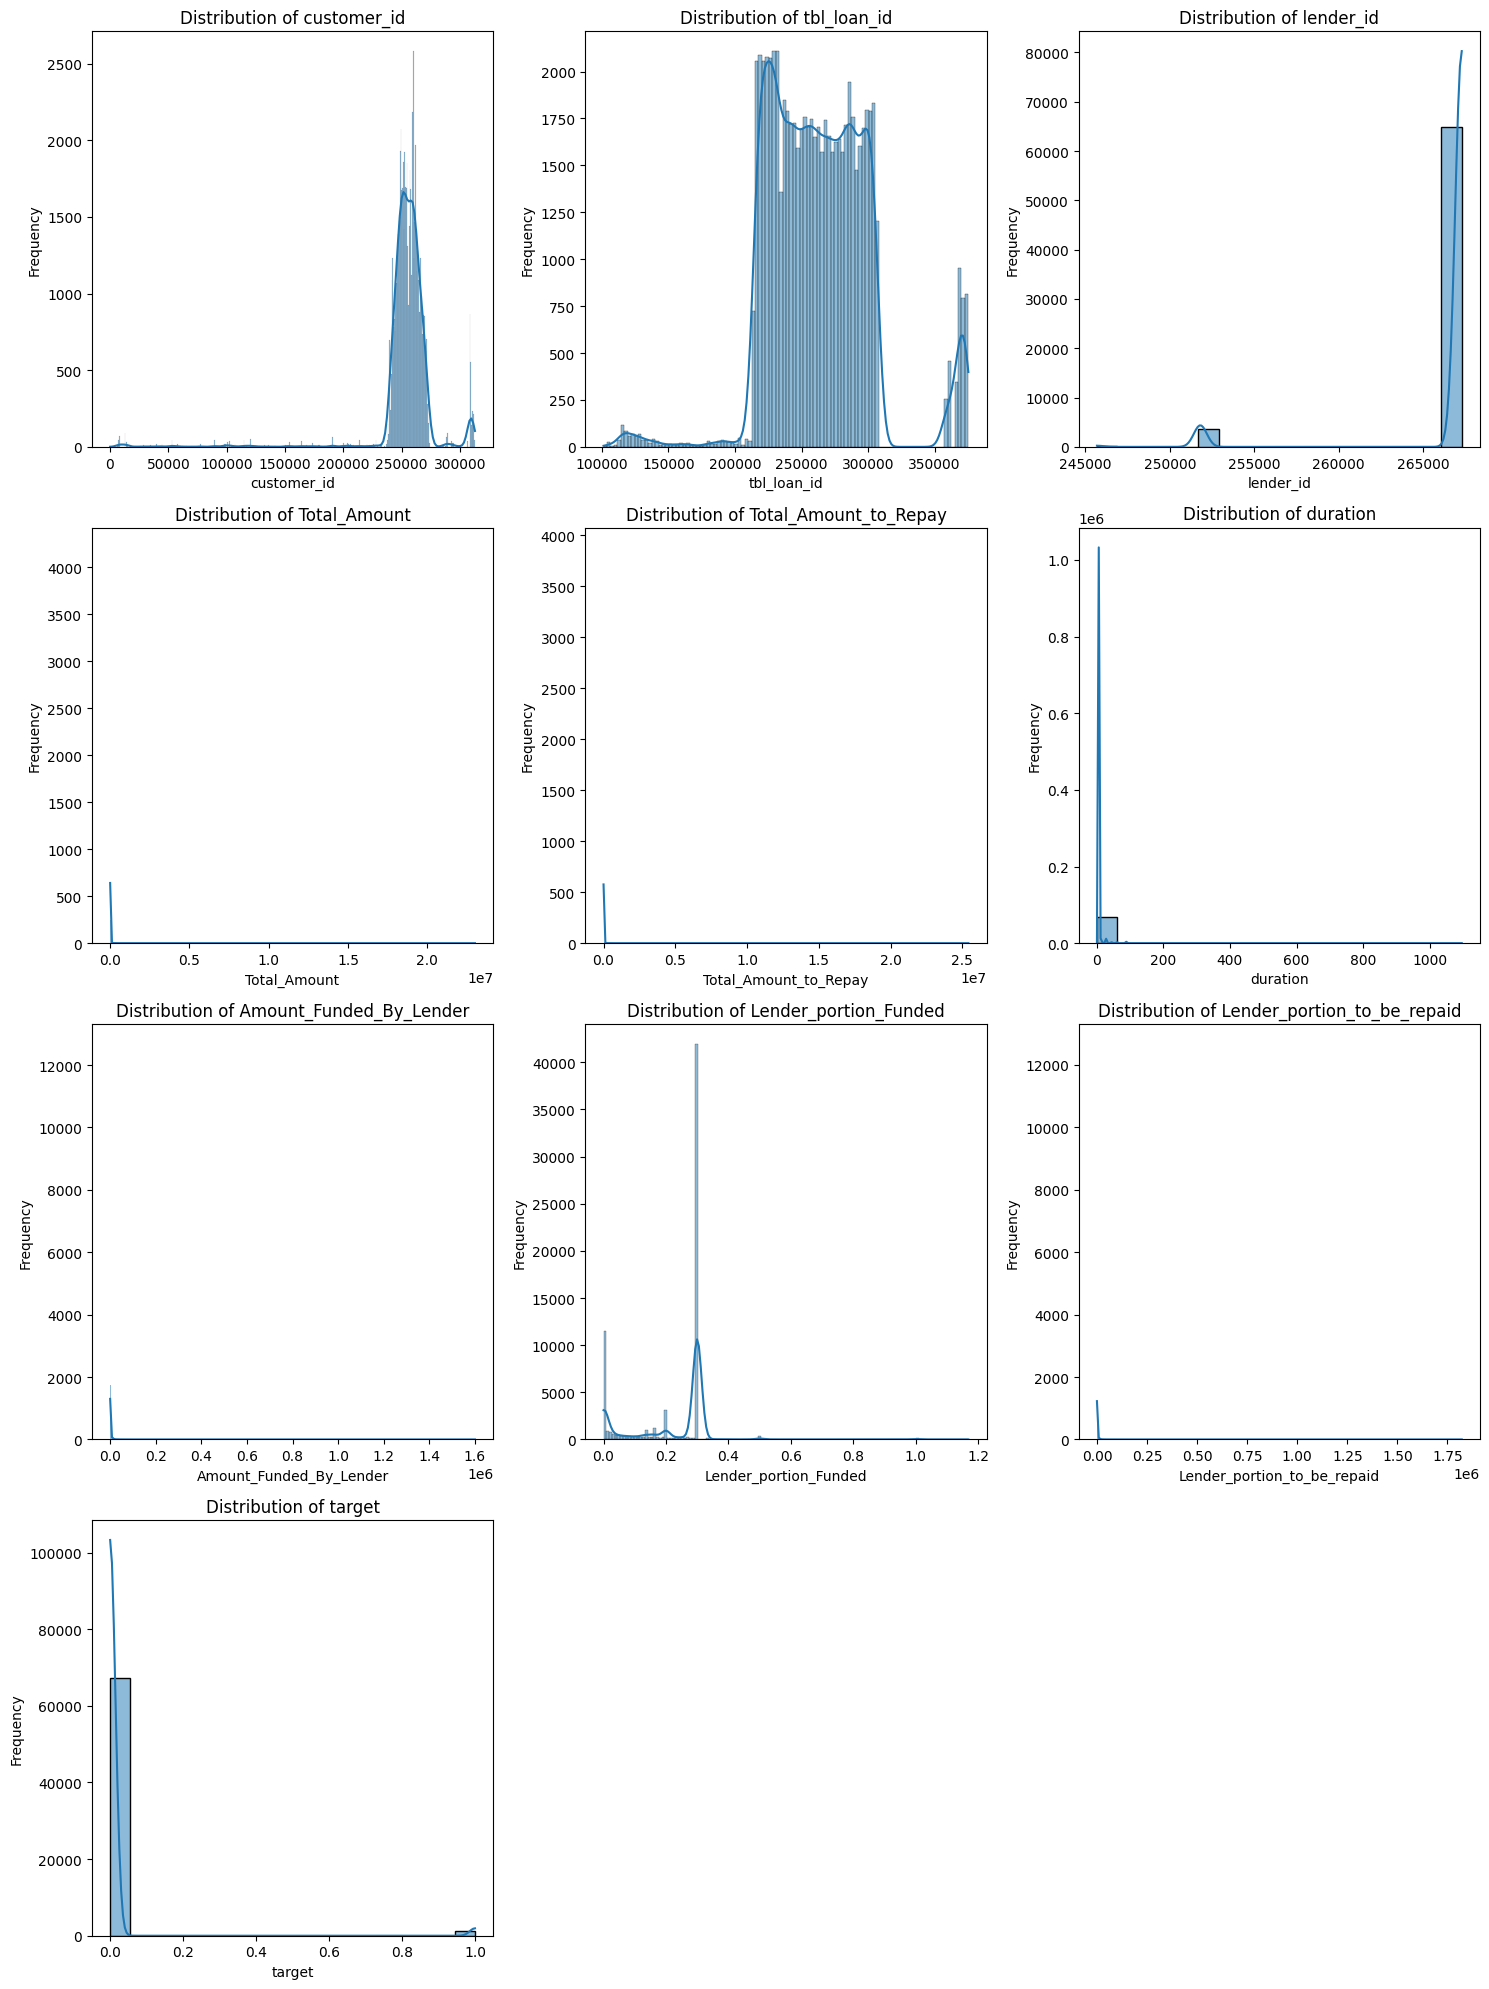

In [11]:
#Plotting the distribution of the dataset

# Assuming 'train' DataFrame is already loaded as shown in the provided code.

# Select numerical columns for distribution plotting
numerical_cols = train.select_dtypes(include=np.number).columns

# Create subplots for each numerical column
num_plots = len(numerical_cols)
num_rows = (num_plots + 2) // 3  # Calculate rows for subplots
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten axes array for easier iteration
axes = axes.ravel()

# Iterate through numerical columns and create distribution plots
for i, col in enumerate(numerical_cols):
    sns.histplot(train[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Exploratory Data Analytics

In [12]:
#Plots visualizations for a continuous variable, showing the distribution and boxplot for both
   # the original and transformed versions of the data.
def plot_continuous(df, column, transform=None):

    # Create subplots for visualizations
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))

    # Original data plots
    sns.histplot(df[column], kde=True, ax=axs[0, 0])
    axs[0, 0].set_title(f'Distribution of {column}')
    axs[0, 0].set_xlabel(column)

    sns.boxplot(y=df[column], ax=axs[1, 0])
    axs[1, 0].set_title(f'Box Plot of {column}')
    axs[1, 0].set_ylabel(column)

    # Transformations (log or square root)
    if transform == 'log':
        transformed_data = np.log1p(df[column])  # log1p handles log(0) gracefully
        transform_label = 'Log'
    elif transform == 'sqrt':
        transformed_data = np.sqrt(df[column])  # Square root transformation
        transform_label = 'Square Root'
    else:
        transformed_data = None  # No transformation if not specified

    # If transformed data exists, generate corresponding plots
    if transformed_data is not None:
        sns.histplot(transformed_data, kde=True, ax=axs[0, 1])
        axs[0, 1].set_title(f'{transform_label} Distribution of {column}')
        axs[0, 1].set_xlabel(f'{transform_label}({column})')

        sns.boxplot(y=transformed_data, ax=axs[1, 1])
        axs[1, 1].set_title(f'{transform_label} Box Plot of {column}')
        axs[1, 1].set_ylabel(f'{transform_label}({column})')
    else:
        # If no transformation, remove the second set of axes
        for ax in [axs[0, 1], axs[1, 1]]:
            ax.remove()

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Plots visualizations for a categorical variable, including a bar plot and a pie chart.
def plot_categorical(df, column):

    # Create subplots for visualizations
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Bar plot showing counts of each category
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1)
    ax1.set_title(f'Bar Plot of {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Count')
    ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

    # Pie chart showing percentage distribution of each category
    ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    ax2.set_title(f'Pie Chart of {column}')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()


#### Categorical exploration

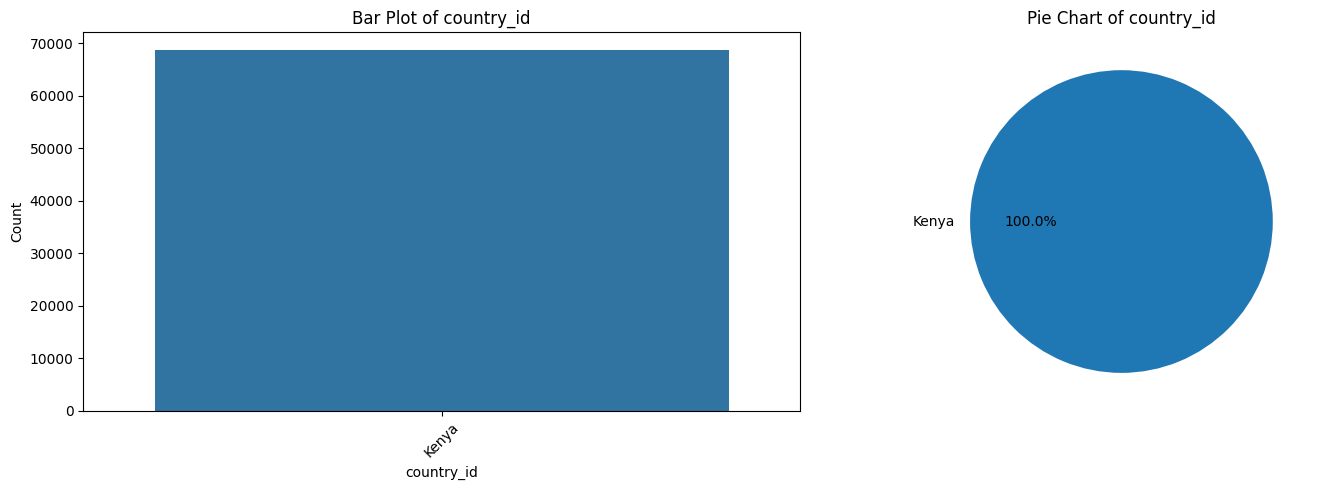

In [13]:
plot_categorical(train, 'country_id')

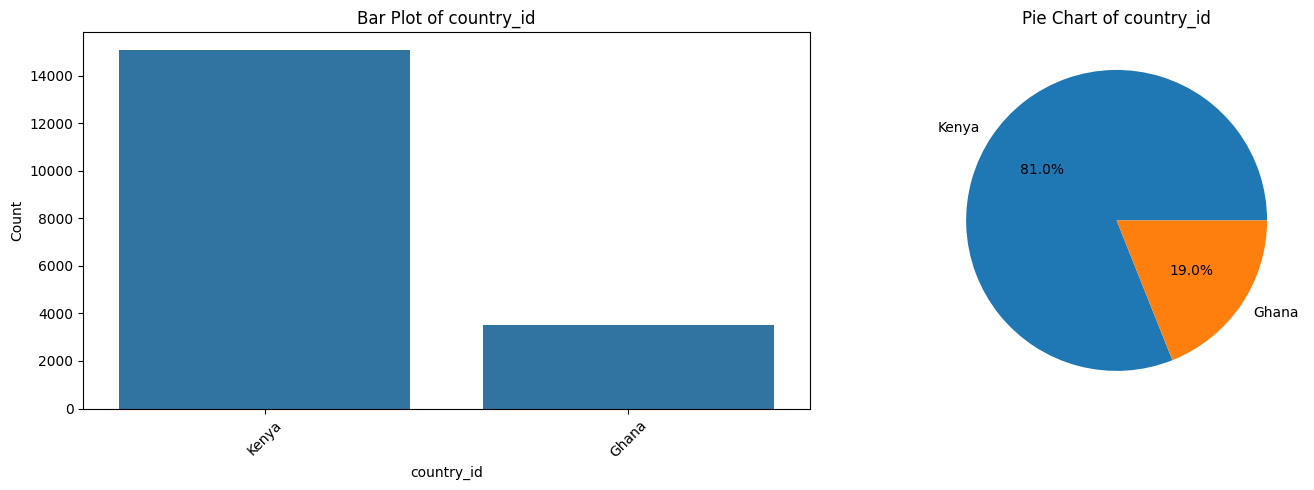

In [14]:
plot_categorical(test, 'country_id')

##### Insight: This shows that test has a new country, ghana so one of the goals is to build a solution that can generalize well in new regions

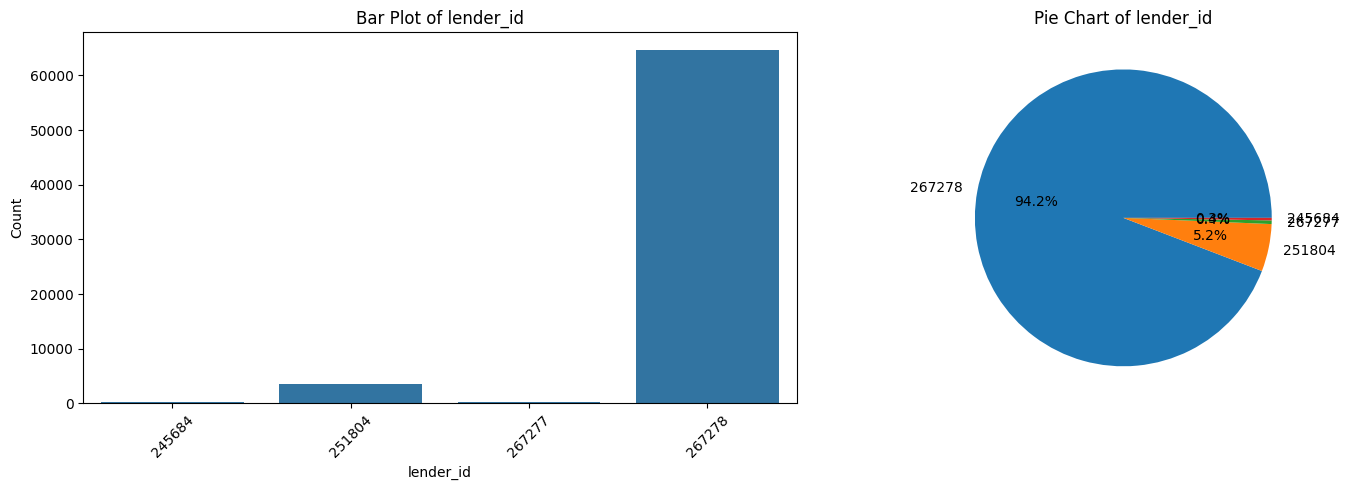

In [15]:
# plotting categorical on lender id
plot_categorical(train, 'lender_id')

#### TARGET EXPLORATION


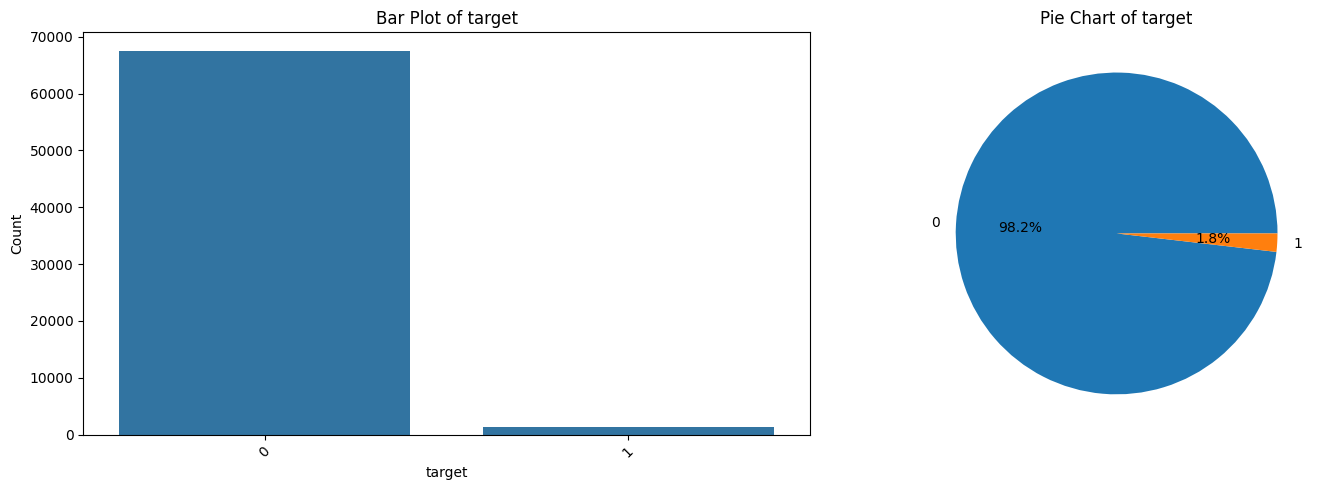

In [16]:
plot_categorical(train, 'target')

##### The dataset is highly imbalanced , and will deal with the  imbalance

In [17]:
# Handling outliers above

def handle_outliers(train, column, method='iqr', threshold=1.5):

    df_copy = train.copy()  # Create a copy to avoid modifying the original

    if method == 'iqr':
        Q1 = df_copy[column].quantile(0.25)
        Q3 = df_copy[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_copy[column] = np.where((df_copy[column] < lower_bound) | (df_copy[column] > upper_bound),
                                   df_copy[column].median(),  # Replacing with median
                                   df_copy[column])

    elif method == 'std':
        mean = df_copy[column].mean()
        std = df_copy[column].std()
        lower_bound = mean - threshold * std
        upper_bound = mean + threshold * std
        df_copy[column] = np.where((df_copy[column] < lower_bound) | (df_copy[column] > upper_bound),
                                   df_copy[column].median(),  # Replacing with median
                                   df_copy[column])
    else:
        print("Invalid method specified. Use 'iqr' or 'std'.")
        return df  # Return original if method invalid

    return df_copy


# Example usage (assuming 'train' DataFrame is loaded):
train_no_outliers = handle_outliers(train, 'Total_Amount') # Example with IQR, replace with suitable column

# Now, 'train_no_outliers' contains the DataFrame with outliers in the 'Total_Amount' column handled.
# Proceed with your further analysis using this modified DataFrame.

There are some outliers which I will handle.



In [18]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = train['Total_Amount'].quantile(0.25)
Q3 = train['Total_Amount'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_df = train[(train['Total_Amount'] >= lower_bound) & (train['Total_Amount'] <= upper_bound)]

# Print results
print(f"Original data shape: {train.shape}")
print(f"Data shape after outlier removal: {filtered_df.shape}")

Original data shape: (68654, 16)
Data shape after outlier removal: (61829, 16)


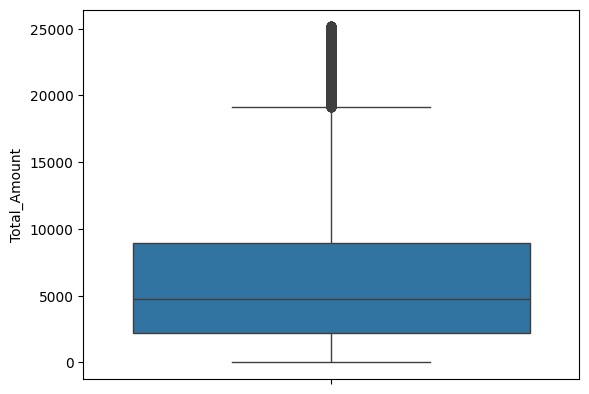

In [19]:
sns.boxplot(data=filtered_df, y='Total_Amount')
plt.show()

### Feature Engineering
* In this step, I will concatenate both the train and test so that we can do the processing once instead of repeating for each

In [20]:
data = pd.concat([train, test]).reset_index(drop=True)

# Convert the datetime columns appropriately
date_cols = ['disbursement_date', 'due_date']
for col in date_cols:
    data[col] = pd.to_datetime(data[col])
    # Extract month, day, and year from the date columns
    data[col+'_month'] = data[col].dt.month
    data[col+'_day'] = data[col].dt.day
    data[col+'_year'] = data[col].dt.year

# Select all categorical columns from the dataset and label encode them or one hot encode
cat_cols = data.select_dtypes(include='object').columns
num_cols = [col for col in data.select_dtypes(include='number').columns if col not in ['target']]
print(f"The categorical columns are: {cat_cols}.")
print("-"* 100)
print(f"The numerical columns are: {num_cols}")
print("-"* 100)
# we are going to one  hot encode the loan type
data = pd.get_dummies(data, columns=['loan_type'], prefix='loan_type', drop_first=False)
# Convert all the columns with prefix loan_type_ to 0/1 instead of False/True
loan_type_cols = [col for col in data.columns if col.startswith('loan_type_')]
data[loan_type_cols] = data[loan_type_cols].astype(int)

# Label-encoding for the other remaining categorical columns
le = LabelEncoder()
for col in [col for col in cat_cols if col not in ['loan_type', 'ID']]:
    data[col] = le.fit_transform(data[col])


# deal with numerical columns: we saw loan amount is  highly right skewed for this we can log transform it
data['Total_Amount'] = np.log1p(data['Total_Amount']) # study other numerical columns and see if they are skewed as well

# Splitting the data back into train and test
train_df = data[data['ID'].isin(train['ID'].unique())]

test_df = data[data['ID'].isin(test['ID'].unique())]

# we are also going to drop the country id as we saw we have only one country in train
features_for_modelling = [col for col in train_df.columns if col not in date_cols + ['ID', 'target', 'country_id']]

# Check if the new datasets have the same rows as train and test datasets
print(f"The shape of train_df is: {train_df.shape}")
print(f"The shape of test_df is: {test_df.shape}")
print(f"The shape of train is: {train.shape}")
print(f"The shape of test is: {test.shape}")
print(f"The features for modelling are:\n{features_for_modelling}")


The categorical columns are: Index(['ID', 'country_id', 'loan_type', 'New_versus_Repeat'], dtype='object').
----------------------------------------------------------------------------------------------------
The numerical columns are: ['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'disbursement_date_month', 'disbursement_date_day', 'disbursement_date_year', 'due_date_month', 'due_date_day', 'due_date_year']
----------------------------------------------------------------------------------------------------
The shape of train_df is: (68654, 45)
The shape of test_df is: (18594, 45)
The shape of train is: (68654, 16)
The shape of test is: (18594, 15)
The features for modelling are:
['customer_id', 'tbl_loan_id', 'lender_id', 'Total_Amount', 'Total_Amount_to_Repay', 'duration', 'New_versus_Repeat', 'Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_

**Plotting data distribution**

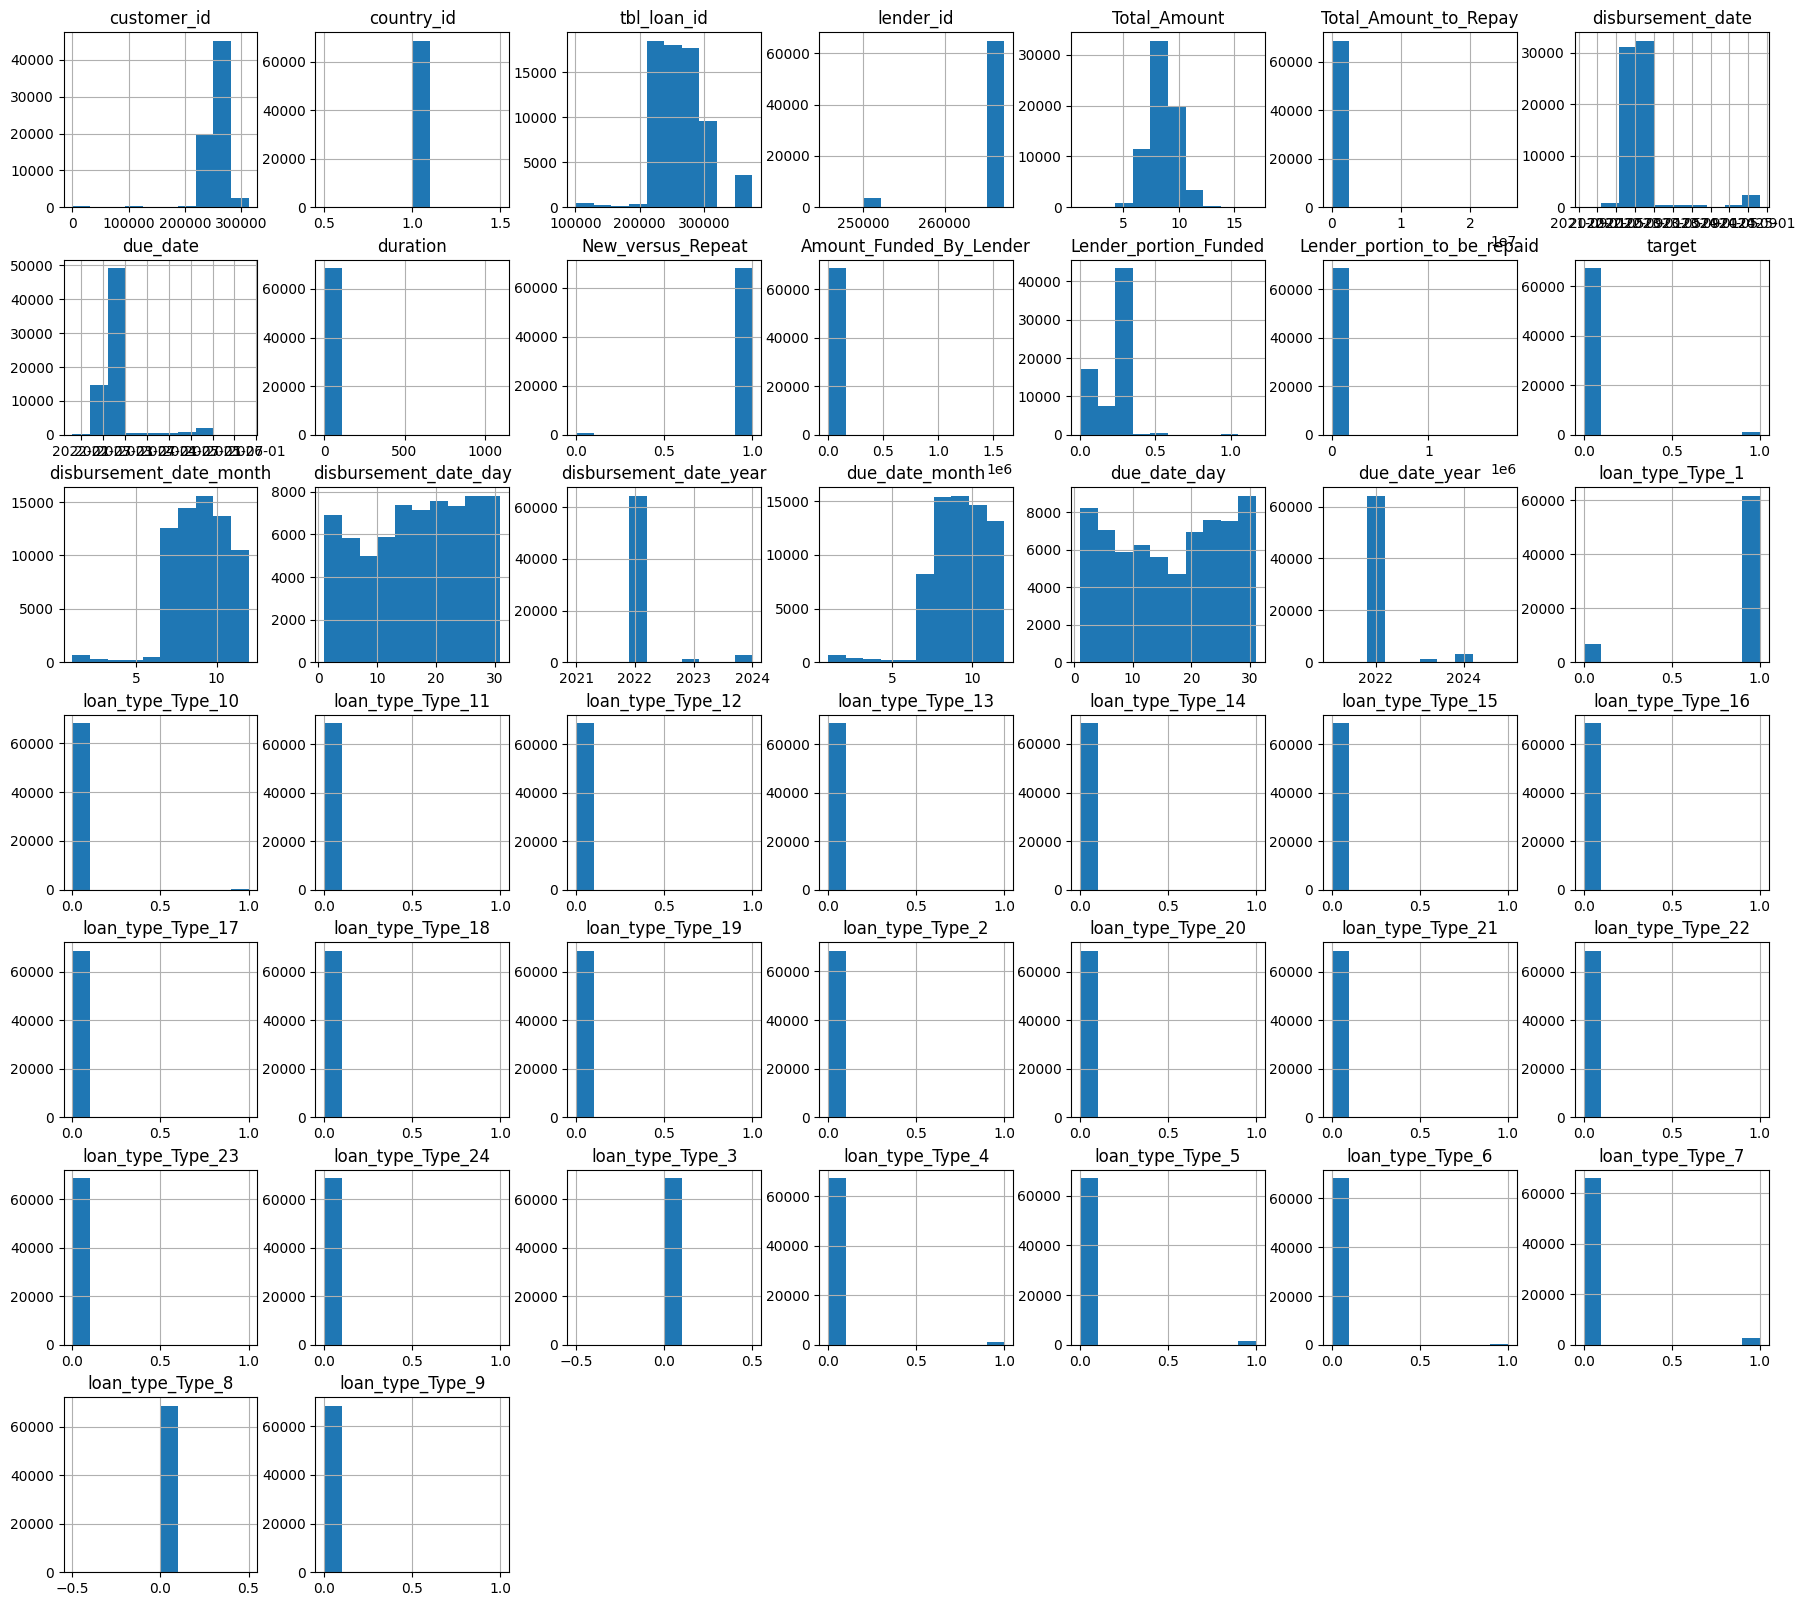

In [21]:
train_df.hist( figsize = (22, 20) )
plt.show()


**Correlation for numerical features in the data**

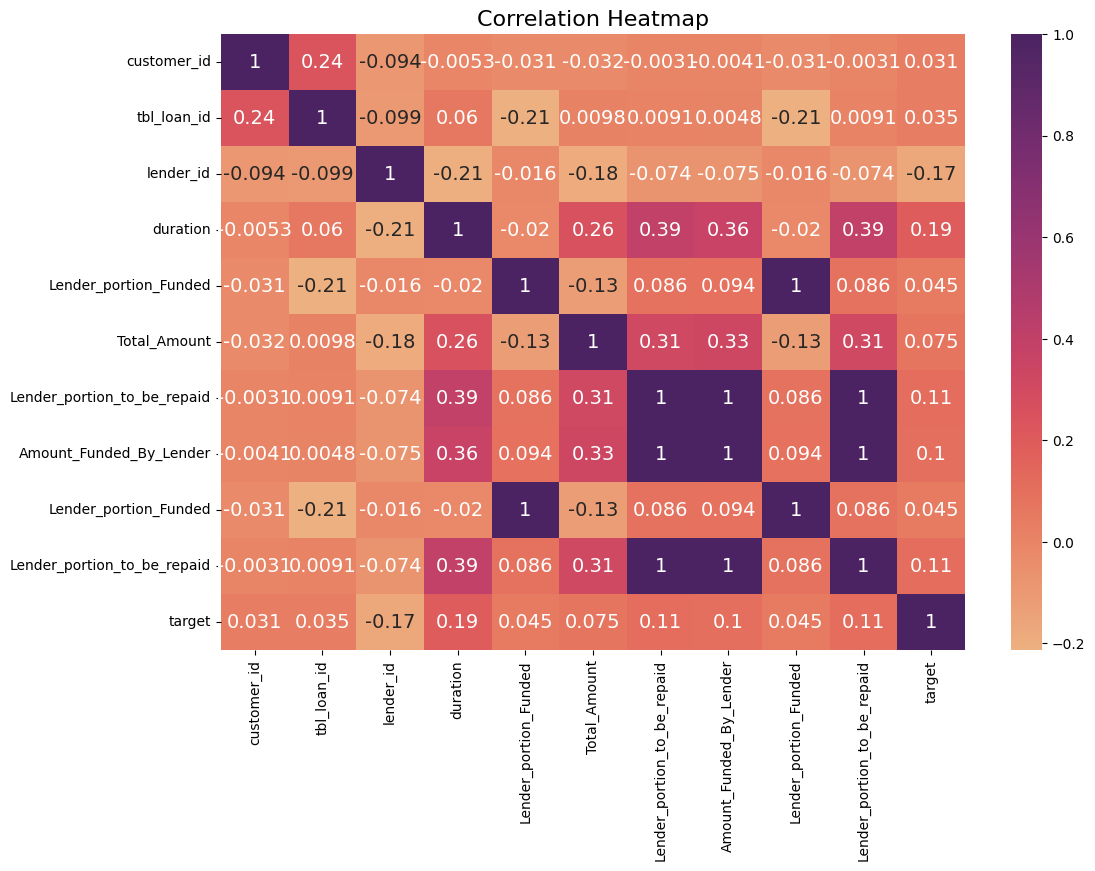

In [22]:
# Function to calculate and display the correlation heatmap for selected columns
def plot_correlation_heatmap(df, selected_columns):

    fig, ax = plt.subplots(figsize=(12, 8))
    corr_matrix = df[selected_columns].corr()
    corr_heatmap = sns.heatmap(
        corr_matrix,
        cmap="flare",
        annot=True,
        ax=ax,
        annot_kws={"size": 14}
    )
    plt.title("Correlation Heatmap", fontsize=16)
    plt.show()

selected_columns = [ 'customer_id', 'tbl_loan_id','lender_id','duration', 'Lender_portion_Funded', 'Total_Amount','Lender_portion_to_be_repaid','Amount_Funded_By_Lender', 'Lender_portion_Funded', 'Lender_portion_to_be_repaid', 'target']
plot_correlation_heatmap(train_df, selected_columns)

### CROSS VALIDATION
* Here we are going to use a simple train test split but due to the imbalance try other robust methods like StratifiedKFold


In [23]:
# train test split the data using stratifiedKfold for imbalances

from sklearn.model_selection import StratifiedKFold

# Assuming 'train_df' and 'features_for_modelling' are defined as in the provided code.
X = train_df[features_for_modelling]
y = train_df['target']

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #5 folds

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Now you can train your model on X_train, y_train and evaluate on X_test, y_test
    print("Train:", train_index, "Test:", test_index)
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    break #remove this to perform the process over all folds

Train: [    0     1     2 ... 68649 68651 68653] Test: [    4     5     9 ... 68642 68650 68652]
(54923, 40) (54923,)
(13731, 40) (13731,)


## Initialisation & Model Training

**Scaling the dataset**

In [24]:
# prompt: scale the dataset using standard scaler from sklearn

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building Machine Learning Models

**Logistic Regression**

**Logistic Regression**

One statistical approach for binary classification is logistic regression. It applies the logistic function (sigmoid function) to a linear combination of input feaatures in order to estimate the likelihood that a given input belongs to a particular class.

Key Parameters
1. random_state: Regulates how random the model is. Accurate findings are guaranteed when a fixed seed, such as 42, is set.
2. class_weight: Modifies weights in inverse proportion to input data class frequencies. In order to ensure that the model gives both classes equal attention during training, setting it to "balanced" reduces problems with class imbalance.

Model Training and Predictions
Training:
 The.fit() method is used to train the model using the scaled training data (X_train_scaled) and labels (y_train).
Prediction:
y_pred: The training data's predicted class labels.
y_pred_proba: The positive class's predicted probabilities, which aid in assessing model confidence.

Evaluation Metrics

F1 Score: A balance between precision and recall, calculated as the harmonic mean of the two. It's especially helpful for addressing imbalances in class.
ROC The area under the Receiver Operating Characteristic curve, or AUC Score, measures how well the model can differentiate between classes. Better performance is indicated with a score nearer 1.



In [25]:
# Logistic Regression Classifier
clf = LogisticRegression(
    random_state=42,
    class_weight="balanced",  # Handle class imbalance
)
clf.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

*Making Predictions*

In [26]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a StandardScaler object named 'scaler' that was fit on X_train
# If not, create one: scaler = StandardScaler()
# and fit it: scaler.fit(X_train)
X_valid_scaled = scaler.transform(X_test)

# Predictions
y_pred = clf.predict(X_valid_scaled)
y_pred_proba = clf.predict_proba(X_valid_scaled)[:, 1]

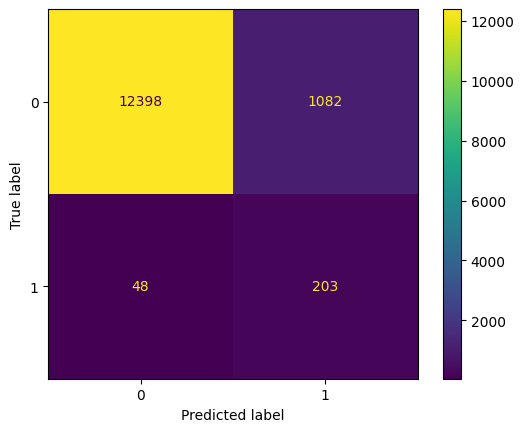

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     13480
         1.0       0.16      0.81      0.26       251

    accuracy                           0.92     13731
   macro avg       0.58      0.86      0.61     13731
weighted avg       0.98      0.92      0.94     13731



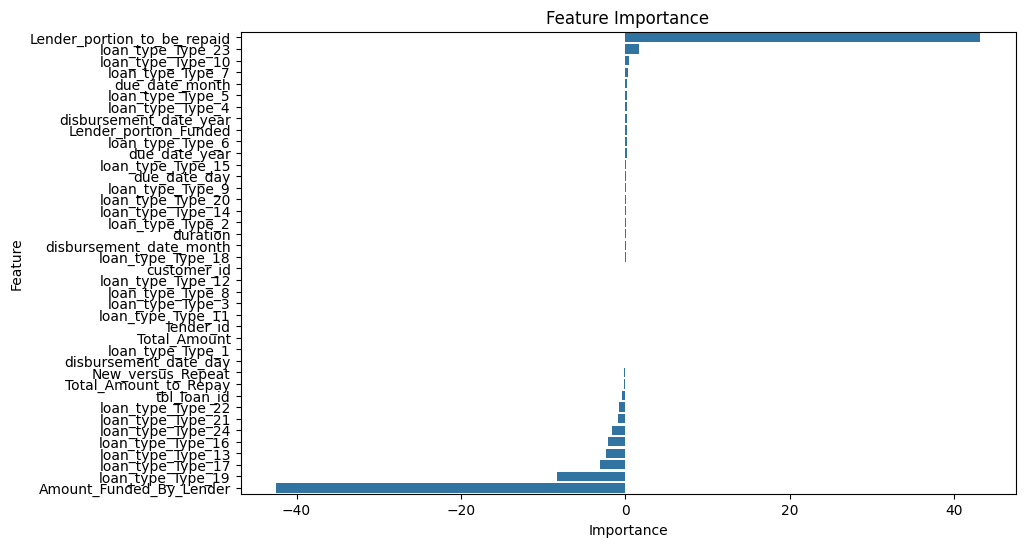

ROC Curve not available as roc_curve is not imported.


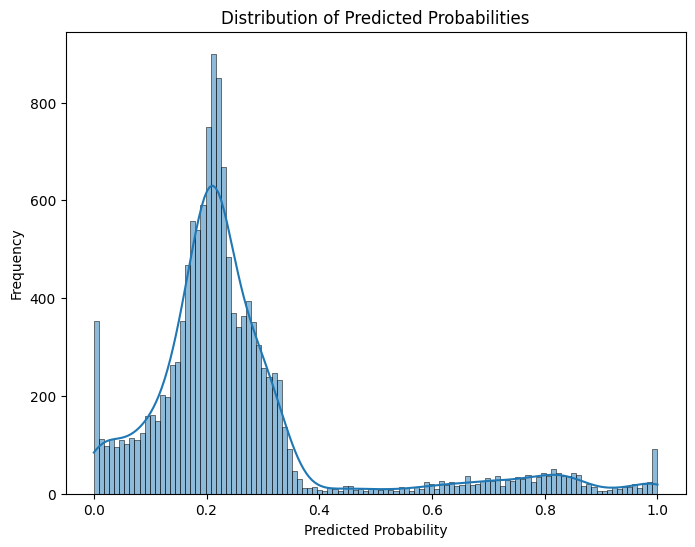

In [27]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming y_test and y_pred are defined from your model training

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Feature Importance (if applicable to your model)
try:
    feature_importance = clf.coef_[0] #example for logistic regression
    feature_importance_df = pd.DataFrame({'Feature': features_for_modelling, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()
except AttributeError:
    print("Feature importance not available for this model type.")


# ROC Curve (if applicable to your model)
try:
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
except NameError: #Handle if roc_curve or roc_auc_score are not imported
  print("ROC Curve not available as roc_curve is not imported.")

# Distribution of predicted probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_proba, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

*Evaluating the Logistic Regression Model*

F1 Score: 0.2643
ROC AUC Score: 0.9378

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.92      0.96     13480
         1.0       0.16      0.81      0.26       251

    accuracy                           0.92     13731
   macro avg       0.58      0.86      0.61     13731
weighted avg       0.98      0.92      0.94     13731



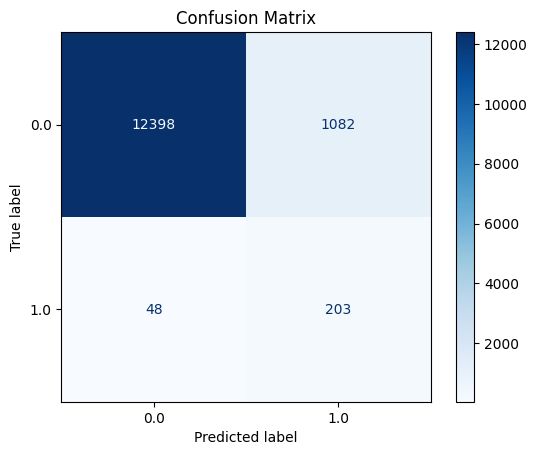

In [28]:
# Evaluation Metrics
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
# Confusion Matrix Visualization
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=clf.classes_,
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix")
plt.show()


**Random Forest Model**

**Random Forest Model**

An ensemble learning technique called the Random Forest Classifier uses several decision trees to increase classification accuracy and lower the chance of overfitting. A random subset of the data and characteristics is used to train each tree, increasing the diversity of the trees.

Key Parameters

1. random_state: By establishing a fixed seed for random number being, this parameter guarantees precision and consistent results between runs.
2. class_weight: Set to "balanced" to adapt class weights inversely proportional to their frequency in the training data, thus addressing class imbalances. This guarantees that during training, the model gives each class equal attention.

Model Training

- A scaled dataset is used to train the model, normalising the feature values to enhance performance and convergence.

Predictions

- After training, the model produces predicted probability and class predictions for the validation dataset. The model's confidence in its predictions is shown by the probabilities.

Evaluation metrics

- F1 Score: This statistic, which balances precision and recall, is particularly helpful in datasets that are unbalanced.
By calculating the area under the ROC curve, the ROC AUC Score measures the model's capacity to discriminate across classes. Better performance is indicated by a higher score.

- Classification Report: Assists in evaluating model performance in a comprehensive manner by offering a thorough analysis of precision, recall, and F1 Score for every class.


In [29]:
# Random forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42, class_weight="balanced")
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

*Making Predictions*

In [30]:
# Predictions
rf_y_pred = rf_clf.predict(X_valid_scaled)
rf_y_pred_proba = rf_clf.predict_proba(X_valid_scaled)[:, 1]

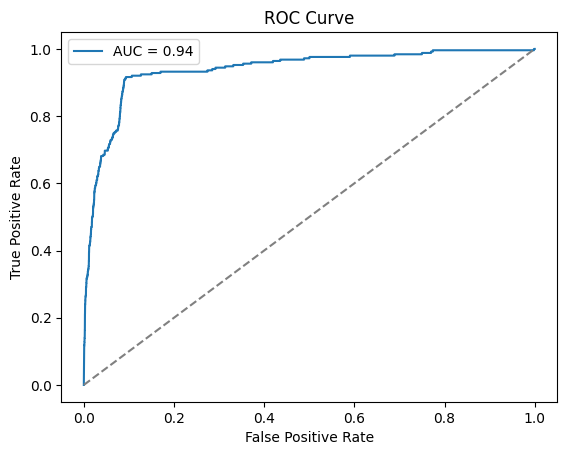

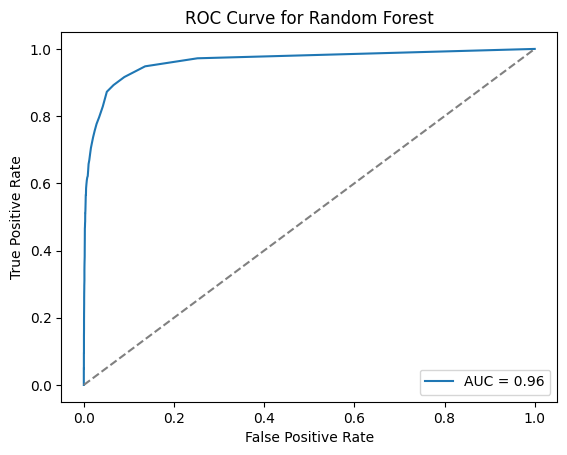

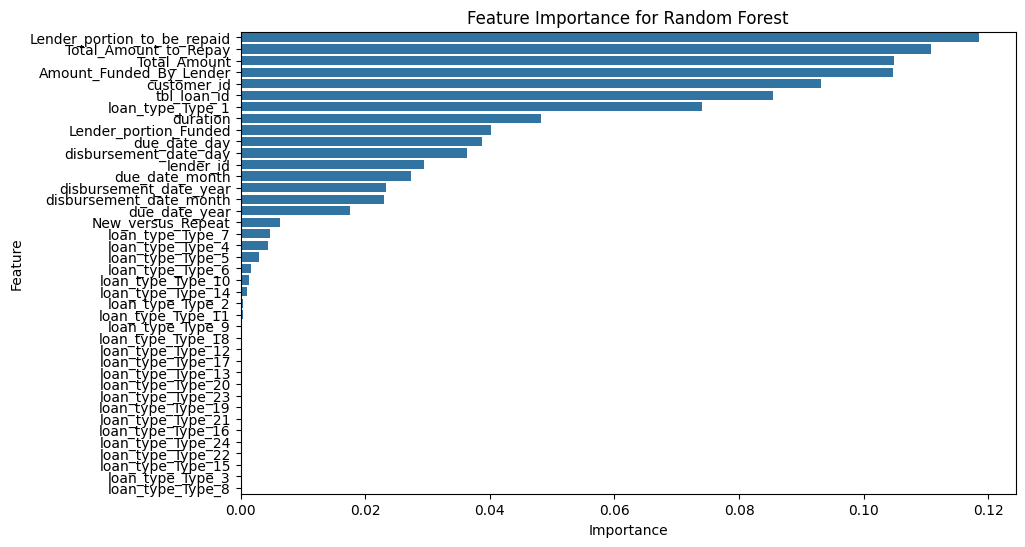

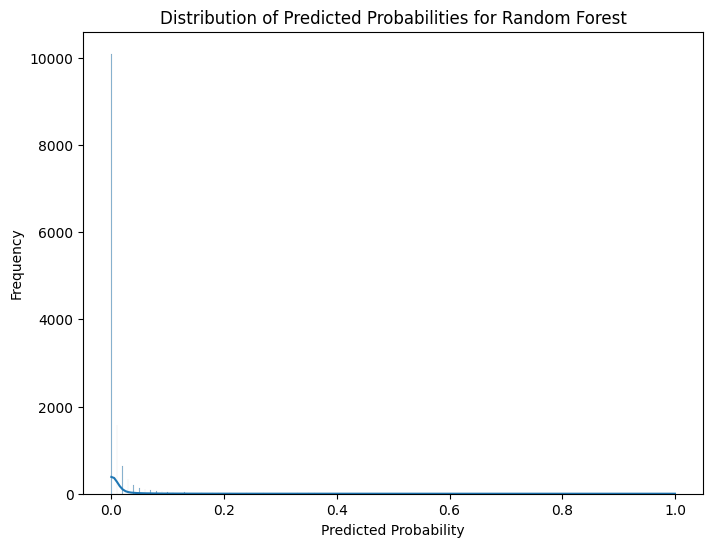

In [31]:
from sklearn.metrics import roc_curve

# ... (Your existing code) ...

# ROC Curve (if applicable to your model)
try:
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
except NameError: #Handle if roc_curve or roc_auc_score are not imported
  print("ROC Curve not available as roc_curve is not imported.")



#For Random Forest
try:
    roc_auc = roc_auc_score(y_test, rf_y_pred_proba)
    fpr, tpr, thresholds = roc_curve(y_test, rf_y_pred_proba)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Random Forest')
    plt.legend()
    plt.show()

    # Feature Importance for Random Forest
    feature_importance = rf_clf.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': features_for_modelling, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance for Random Forest')
    plt.show()

except NameError:
    print("ROC Curve or feature importance not available for Random Forest.")

# Distribution of predicted probabilities for Random Forest
plt.figure(figsize=(8, 6))
sns.histplot(rf_y_pred_proba, kde=True)
plt.title('Distribution of Predicted Probabilities for Random Forest')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

*Evaluating the Reandom Forest Model*

Random Forest - F1 Score: 0.3648
Random Forest - ROC AUC Score: 0.9638

Random Forest - Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     13480
         1.0       0.87      0.23      0.36       251

    accuracy                           0.99     13731
   macro avg       0.93      0.62      0.68     13731
weighted avg       0.98      0.99      0.98     13731



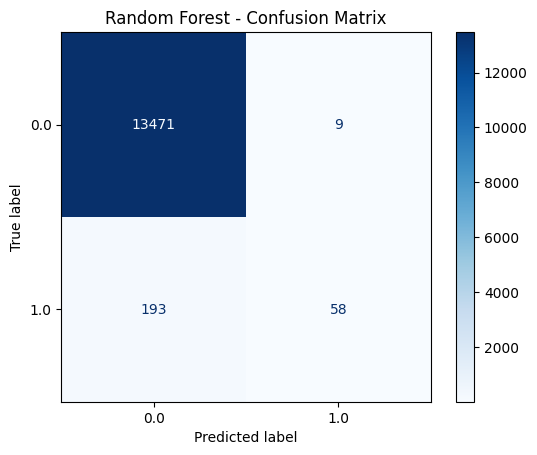

In [32]:
# Evaluate the RandomForestClassifier
rf_f1 = f1_score(y_test, rf_y_pred)
rf_roc_auc = roc_auc_score(y_test, rf_y_pred_proba)

print(f"Random Forest - F1 Score: {rf_f1:.4f}")
print(f"Random Forest - ROC AUC Score: {rf_roc_auc:.4f}")
print("\nRandom Forest - Classification Report:\n", classification_report(y_test, rf_y_pred))

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(
    y_test,
    rf_y_pred,
    display_labels=rf_clf.classes_,
    cmap=plt.cm.Blues
)
plt.title("Random Forest - Confusion Matrix")
plt.show()

**XG Boost**

**XG Boost**

Based on gradient boosting frameworks, XGBoost (Extreme Gradient Boosting) is a potent and effective machine learning technique. It is frequently utilised in competitive machine learning because of its speed and performance, which make it especially well-suited for classification and regression problems.

Key parameters

1. random_state: To guarantee reproducibility of results, this parameter is set to a fixed value (42). By regulating the model's randomness, it enables consistent outcomes across runs.
2. use_label_encoder: Set to False to disable label encoding warnings, particularly in XGBoost versions where this parameter is necessary for compatibility.
3. eval_metric: This option indicates the training evaluation metric. In this case, it is set to 'logloss', which gives information on the accuracy of the model by evaluating its performance in terms of the probability it forecasts.

Model Training
The scaled training dataset (X_train_scaled) and associated labels (y_train) are used to train the XGBoost classifier. By optimising the decision trees using the training data, the.fit() method creates the model.

Predictions

After training, the model predicts using the X_valid_scaled validation dataset:

xgb_y_pred: For the validation data, the predicted class labels are contained in xgb_y_pred
xgb_y_pred_proba:  Stores the predicted probabilities for the positive class, which can be used for thresholding and evaluating model confidence.


Model Evaluation

Several metrics are used to evaluate the XGBoost model's performance:

1. F1 Score: This metric assesses how well accuracy and recall are balanced, producing a single score that represents the model's performance. It is especially helpful for datasets that are unbalanced.
2. ROC By calculating the area under the Receiver Operating Characteristic curve, the AUC score assesses the model's capacity to discriminate across classes. Better categorisation performance is indicated by a higher score.
3. The classification report offers extensive metrics (precision, recall, F1 Score, and support) for every class, enabling a thorough evaluation of the model's performance.


Confusion Matrix

The model's performance is visualised by the confusion matrix, which displays the numbers of false positives, false negatives, true positives, and true negatives. This aids in further model improvement by pointing out particular places where the model might have made errors.



In [33]:
# XG Boost model up to evaluate

!pip install xgboost

import xgboost as xgb

# Initialize and train the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

*Making Predictions*

In [34]:
#Predictions using xgb
xgb_y_pred = xgb_clf.predict(X_valid_scaled)
xgb_y_pred_proba = xgb_clf.predict_proba(X_valid_scaled)[:, 1]

*Evaluating the model*

XGBoost - F1 Score: 0.7156
XGBoost - ROC AUC Score: 0.9857

XGBoost - Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     13480
         1.0       0.88      0.60      0.72       251

    accuracy                           0.99     13731
   macro avg       0.94      0.80      0.86     13731
weighted avg       0.99      0.99      0.99     13731



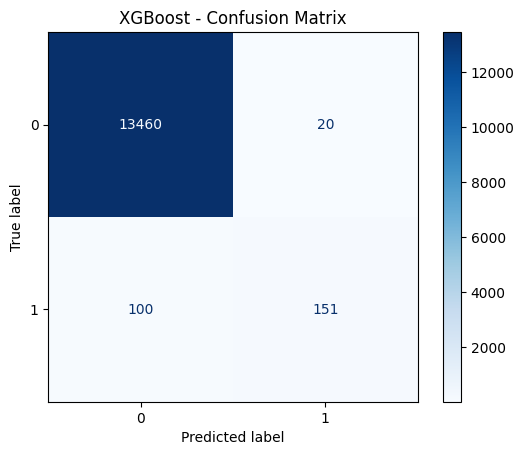

In [35]:
# model evaluation XGBoost Model
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred_proba)

print(f"XGBoost - F1 Score: {xgb_f1:.4f}")
print(f"XGBoost - ROC AUC Score: {xgb_roc_auc:.4f}")
print("\nXGBoost - Classification Report:\n", classification_report(y_test, xgb_y_pred))

# Confusion Matrix for XGBoost
ConfusionMatrixDisplay.from_predictions(
    y_test,
    xgb_y_pred,
    display_labels=xgb_clf.classes_,
    cmap=plt.cm.Blues
)
plt.title("XGBoost - Confusion Matrix")
plt.show()

### FEATURE IMPORTANCE

A technique for determining each feature's (or variable's) contribution to machine learning model prediction is feature importance. This makes it easier to see which features have the biggest impact on the model's decision-making process.

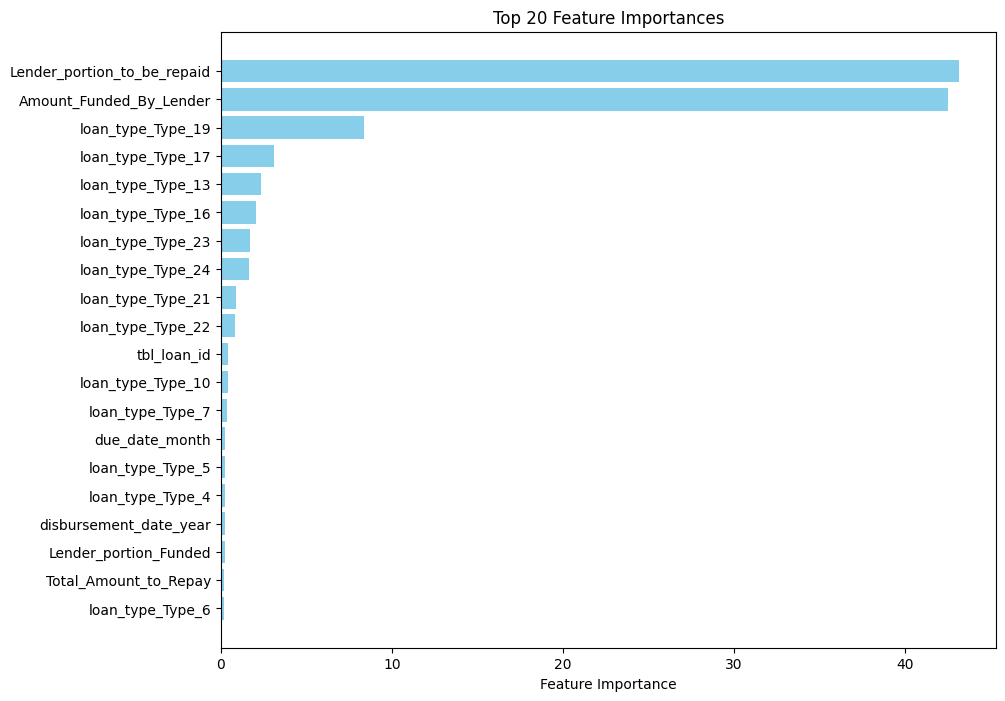

In [36]:
# Feature Importance

# Get the absolute values of the coefficients
feature_importances = np.abs(clf.coef_).flatten()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': features_for_modelling,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.xlabel('Feature Importance')
plt.title('Top 20 Feature Importances')
plt.show()

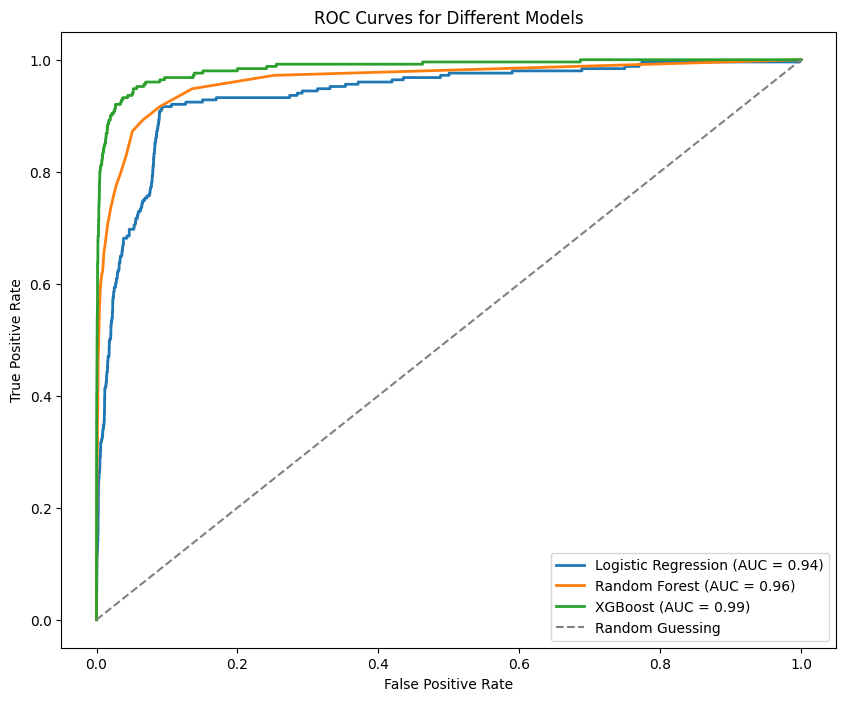

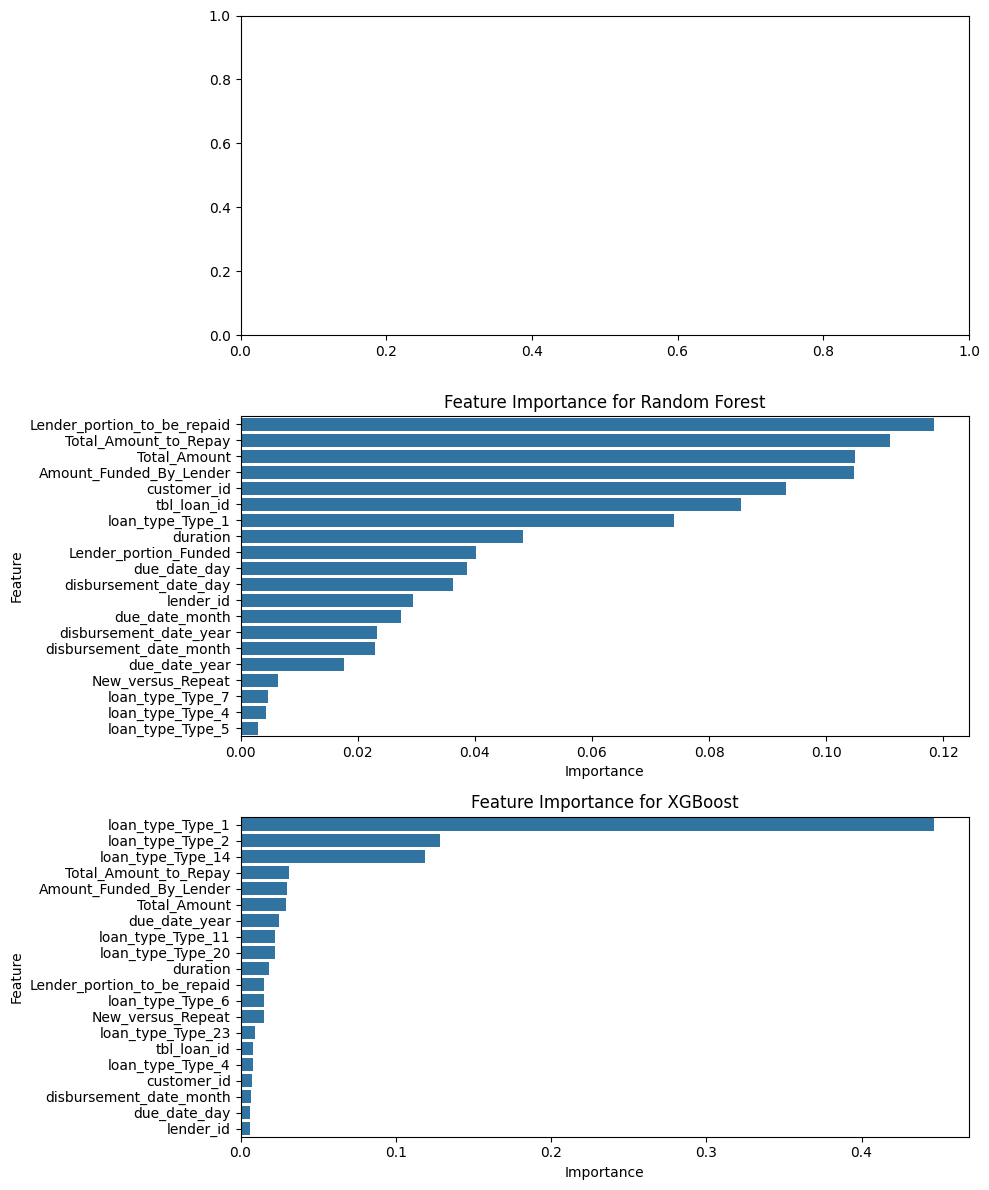

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, X_test, y_test, model_names):
    """Plots ROC curves for multiple models on a single plot.

    Args:
        models: A list of trained classifier models.
        X_test: Test features.
        y_test: True labels for the test set.
        model_names: A list of names for the models, corresponding to the models list.
    """
    plt.figure(figsize=(10, 8))
    for model, name in zip(models, model_names):
        try:
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')
        except AttributeError:
            print(f"Warning: {name} does not have predict_proba method. Skipping ROC curve.")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Models')
    plt.legend(loc='lower right')
    plt.show()


def plot_feature_importances(models, features, model_names):
  """Plots feature importances for multiple models.

  Args:
    models: A list of trained models.
    features: A list of feature names.
    model_names: A list of model names.
  """
  num_models = len(models)
  fig, axes = plt.subplots(num_models, 1, figsize=(10, 4 * num_models))
  if num_models == 1:
      axes = [axes]

  for i, (model, name) in enumerate(zip(models, model_names)):
      try:
          importances = model.feature_importances_
          importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
          importance_df = importance_df.sort_values(by='Importance', ascending=False)
          sns.barplot(x='Importance', y='Feature', data=importance_df.head(20), ax=axes[i])
          axes[i].set_title(f'Feature Importance for {name}')
      except AttributeError:
          print(f"Warning: Could not get feature importances for {name}.")
  plt.tight_layout()
  plt.show()


# Example usage after training your models
models = [clf, rf_clf, xgb_clf] #replace with your trained models
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
plot_roc_curves(models, X_test_scaled, y_test, model_names)

plot_feature_importances(models, features_for_modelling, model_names)

In [38]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for each model
models = {'Logistic Regression': clf, 'Random Forest': rf_clf, 'XGBoost': xgb_clf}
results = {}

for model_name, model in models.items():
  y_pred = model.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  results[model_name] = accuracy
  print(f'{model_name} accuracy: {accuracy}')

# Compare models based on accuracy
best_model = max(results, key=results.get)
print(f'\nBest performing model based on accuracy: {best_model} with accuracy: {results[best_model]}')

Logistic Regression accuracy: 0.9177044643507392
Random Forest accuracy: 0.9852887626538489
XGBoost accuracy: 0.9912606510814944

Best performing model based on accuracy: XGBoost with accuracy: 0.9912606510814944


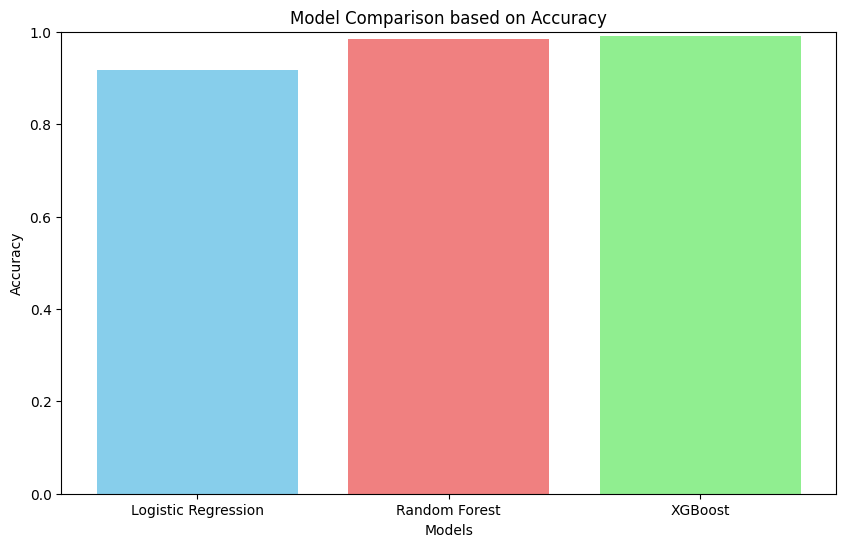

In [39]:
import matplotlib.pyplot as plt

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison based on Accuracy")
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.show()

X-boost is the model of choice with the highest accuracy


In [40]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'scale_pos_weight': [1, 10, 25]
}

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Set up Randomized Search
random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_scaled, y_train)

# Best parameters and evaluation
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [41]:
# Refit the model with the best parameters
best_xgb_model = xgb.XGBClassifier(
    subsample=0.8,
    scale_pos_weight=10,
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

best_xgb_model.fit(X_train_scaled, y_train)

# Evaluate on validation data
xgb_y_pred = best_xgb_model.predict(X_valid_scaled)
xgb_y_pred_proba = best_xgb_model.predict_proba(X_valid_scaled)[:, 1]

from sklearn.metrics import f1_score, roc_auc_score, classification_report
xgb_f1 = f1_score(y_test, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_y_pred_proba)

print(f"Tuned XGBoost - F1 Score: {xgb_f1:.4f}")
print(f"Tuned XGBoost - ROC AUC Score: {xgb_roc_auc:.4f}")
print("\nTuned XGBoost - Classification Report:\n", classification_report(y_test, xgb_y_pred))


Tuned XGBoost - F1 Score: 0.7520
Tuned XGBoost - ROC AUC Score: 0.9841

Tuned XGBoost - Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13480
         1.0       0.74      0.76      0.75       251

    accuracy                           0.99     13731
   macro avg       0.87      0.88      0.87     13731
weighted avg       0.99      0.99      0.99     13731



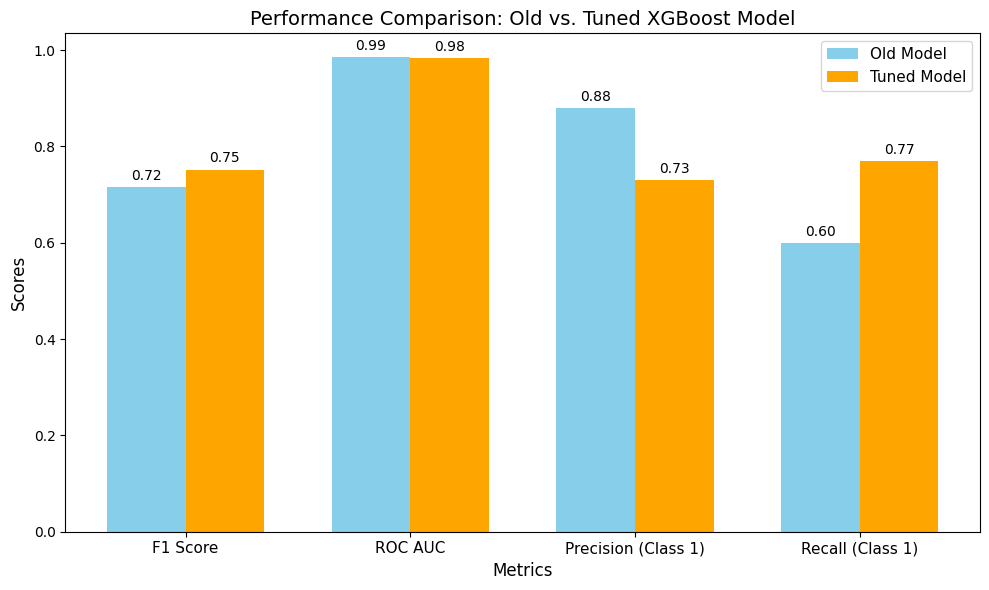

In [42]:
# visual of comparison of the old xg boost and the new xg boost

import matplotlib.pyplot as plt
import numpy as np

# Data for the old and tuned model results
metrics = ["F1 Score", "ROC AUC", "Precision (Class 1)", "Recall (Class 1)"]
old_results = [0.7156, 0.9857, 0.88, 0.60]
new_results = [0.7519, 0.9837, 0.73, 0.77]

# Create bar positions
x = np.arange(len(metrics))
width = 0.35

# Plot the bars
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width / 2, old_results, width, label="Old Model", color="skyblue")
bar2 = ax.bar(x + width / 2, new_results, width, label="Tuned Model", color="orange")

# Add labels, title, and legend
ax.set_xlabel("Metrics", fontsize=12)
ax.set_ylabel("Scores", fontsize=12)
ax.set_title("Performance Comparison: Old vs. Tuned XGBoost Model", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11)

# Add value labels on top of bars
for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate(f"{height:.2f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha="center", va="bottom", fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

- The tuned XGBoost model shows significant improvement in performance, particularly for the minority class.
- The F1 score increased from 0.7156 to 0.7519, and recall improved substantially from 0.60 to 0.77, indicating better identification of minority class instances.
- Although precision decreased from 0.88 to 0.73, this reflects a trade-off for reducing false negatives.
- The ROC AUC remained high, slightly dropping from 0.9857 to 0.9837, showing the model retains strong overall classification ability. These improvements make the tuned model more balanced and effective for imbalanced datasets, especially when minority class predictions are critical.

In [43]:
# Save the model
import joblib

joblib.dump(best_xgb_model, "best_xgboost_model.pkl")

# Load the model
loaded_model = joblib.load("best_xgboost_model.pkl")

In [44]:
import joblib

joblib.dump(xgb_clf, 'xgboost_model.pkl')

['xgboost_model.pkl']

## Model Prediction & Inference

In [45]:
# Make predictions on the test dataset
test_predictions = clf.predict(test_df[features_for_modelling])
test_predictions_proba = clf.predict_proba(test_df[features_for_modelling])[:, 1]

# Save the predictions to a CSV file

test_df['target'] = test_predictions
sub =  test_df[['ID', 'target']]
sub.head()


,ID,target
68654,ID_269404226088267278,0.0
68655,ID_255356300042267278,0.0
68656,ID_257026243764267278,0.0
68657,ID_264617299409267278,0.0
68658,ID_247613296713267278,0.0


In [46]:
sub.to_csv('baseline_submission.csv', index=False)

# Architecture of the ML parameters used

In [47]:
from graphviz import Digraph

#initialise the diagram
dot = Digraph('Loan Default Prediction Model', format='png')

#input layer
dot.node('Input', 'Input Features(GDP, Inflation, Credit Score)', color='Blue')
#data processing
dot.node('Preprocessing', 'Data Preprocessing & Feature Engineering)', color='Blue')
dot.edge('Input', 'Preprocessing', label='Data Cleaning, Scaling, Encoding', color='red')
#machine learning algorithm
dot.node('Model', 'Machine Learning Algorithm(Logistic Regression, RF, XGBoost, Neural Network)', color='Blue')
dot.edge('Preprocessing', 'Model', label='Processed Data', color='red')

#output layer
dot.node('Output', 'Predictions (Default/No Default)', color='Blue')
dot.edge('Model', 'Output', label='Predicted Probability', color='red')

#render the diagram
dot.render('loan_default_prediction_model', view=True)



'loan_default_prediction_model.png'

# **Conclusion**

By accurately predicting deploying the loan defaults, it will enable the client organisation to create a credit scoring solution to evaluate risk more effectively, improving decision-making, reducing financial losses associated with high-risk lending, and allowing for expansion into new financial markets.